1. Korzystając z sieci GAN napisać własny generator przykładów. Trening generatora proszę wizualizować
co epokę na wszystkich klasach. Generator dobrze szkolony będzie generować coraz lepsze obrazy
przedstawicieli klas, aż w końcu trudno będzie odróżnić zbiór rzeczywisty, od wygenerowanego.

In [ ]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt

torch.manual_seed(111)

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.cos(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

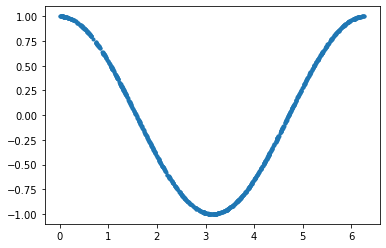

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.model(x)
        return output

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output



In [ ]:
discriminator = Discriminator()
generator = Generator()

lr = 0.001
num_epochs = 100
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

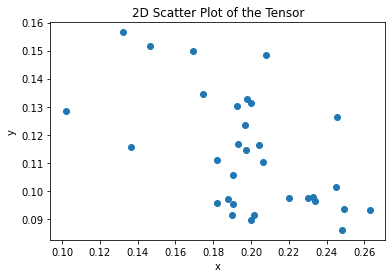

Epoch: 0 Loss D.: 0.20779000222682953
Epoch: 0 Loss G.: 1.6851167678833008
Epoch: 10 Loss D.: 0.6436312198638916
Epoch: 10 Loss G.: 0.8849819302558899
Epoch: 20 Loss D.: 0.49165454506874084
Epoch: 20 Loss G.: 0.9594895243644714


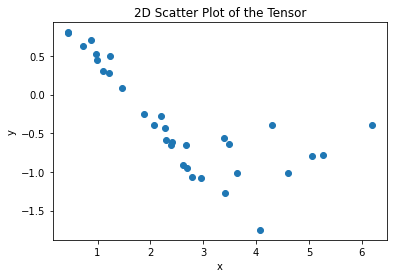

Epoch: 30 Loss D.: 0.5938340425491333
Epoch: 30 Loss G.: 0.7650165557861328
Epoch: 40 Loss D.: 0.663860559463501
Epoch: 40 Loss G.: 0.7566441297531128
Epoch: 50 Loss D.: 0.6808412075042725
Epoch: 50 Loss G.: 0.73389732837677


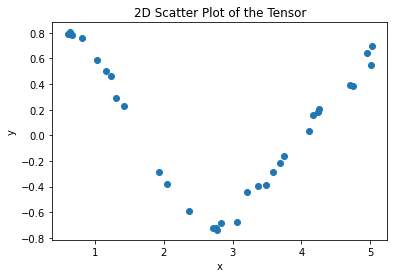

Epoch: 60 Loss D.: 0.6430153250694275
Epoch: 60 Loss G.: 0.6950826644897461
Epoch: 70 Loss D.: 0.6856716275215149
Epoch: 70 Loss G.: 1.0086199045181274
Epoch: 80 Loss D.: 0.7487973570823669
Epoch: 80 Loss G.: 0.6606816649436951


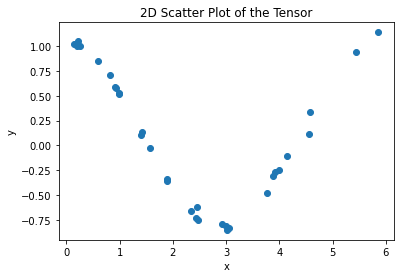

Epoch: 90 Loss D.: 0.6468669772148132
Epoch: 90 Loss G.: 0.7370173931121826


In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)

        numpy_array = generated_samples.detach().numpy()     
        if(epoch % 30 == 0 and n == 1):
          x = [vector[0] for vector in numpy_array]
          y = [vector[1] for vector in numpy_array]
          plt.scatter(x, y)
          plt.xlabel("x")
          plt.ylabel("y")
          plt.title("2D Scatter Plot of the Tensor")
          plt.show()

        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

2. Za pomocą sieci GAN wygenerować dane dopasowane do zadanego rozkładu. Dane prawdziwe
generować jako funkcję lekko zaburzoną szumen, np. wielomian n-tego stopnia, sinusoidę (-pi, pi),
segment okręgu, kwadratu, itp., etykieta=1. Dane generowane generować z losowych wektorów o
wymiarze P, etykieta=0. Zwizualizować co epokę jak punkty generowane coraz lepiej pasują do rozkładu
punktów prawdziwych. 

In [ ]:
import torch

train_data_length = 1024
train_data = torch.randn((train_data_length, 2))
train_labels = torch.zeros(train_data_length)
train_set = [    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

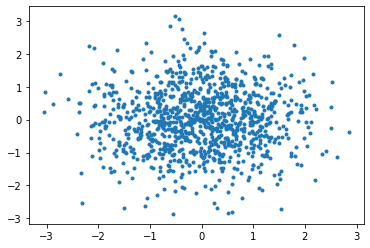

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

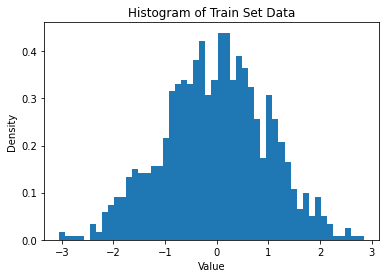

In [ ]:
data = train_data[:, 0].numpy()

plt.hist(data, bins=50, density=True)
plt.title("Histogram of Train Set Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
discriminator = Discriminator()
generator = Generator()

lr = 0.001
num_epochs = 200
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

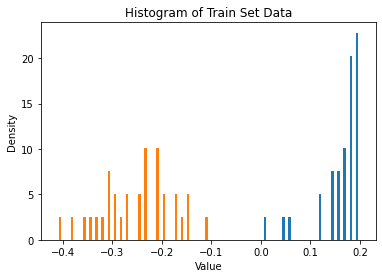

Epoch: 0 Loss D.: 0.27203643321990967
Epoch: 0 Loss G.: 1.499749779701233
Epoch: 10 Loss D.: 0.6753993630409241
Epoch: 10 Loss G.: 0.6855722665786743
Epoch: 20 Loss D.: 0.6975003480911255
Epoch: 20 Loss G.: 0.6762250065803528


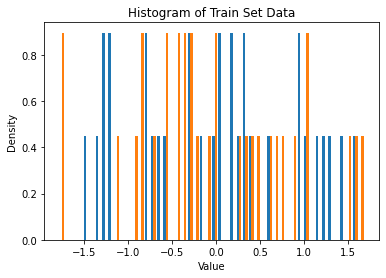

Epoch: 30 Loss D.: 0.6833087205886841
Epoch: 30 Loss G.: 0.6818403005599976
Epoch: 40 Loss D.: 0.689875066280365
Epoch: 40 Loss G.: 0.7204969525337219
Epoch: 50 Loss D.: 0.6887134313583374
Epoch: 50 Loss G.: 0.6780035495758057


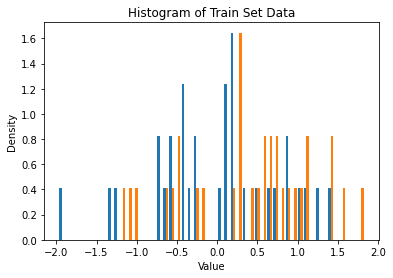

Epoch: 60 Loss D.: 0.6848211288452148
Epoch: 60 Loss G.: 0.7143635153770447
Epoch: 70 Loss D.: 0.6916089653968811
Epoch: 70 Loss G.: 0.6879963278770447
Epoch: 80 Loss D.: 0.695370614528656
Epoch: 80 Loss G.: 0.7064743041992188


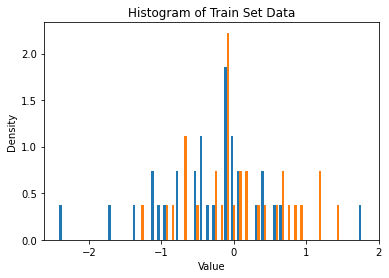

Epoch: 90 Loss D.: 0.6917452812194824
Epoch: 90 Loss G.: 0.663688600063324
Epoch: 100 Loss D.: 0.680359959602356
Epoch: 100 Loss G.: 0.7082763314247131
Epoch: 110 Loss D.: 0.6863942742347717
Epoch: 110 Loss G.: 0.689851701259613


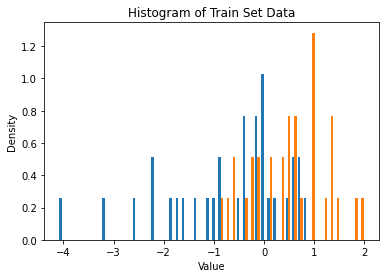

Epoch: 120 Loss D.: 0.6757689118385315
Epoch: 120 Loss G.: 0.7371740341186523
Epoch: 130 Loss D.: 0.7009885311126709
Epoch: 130 Loss G.: 0.6975388526916504
Epoch: 140 Loss D.: 0.7089516520500183
Epoch: 140 Loss G.: 0.6596987843513489


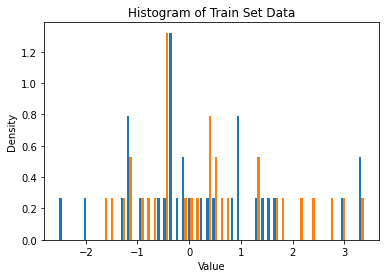

Epoch: 150 Loss D.: 0.6870951652526855
Epoch: 150 Loss G.: 0.6953921914100647
Epoch: 160 Loss D.: 0.693454384803772
Epoch: 160 Loss G.: 0.6994086503982544
Epoch: 170 Loss D.: 0.6817916631698608
Epoch: 170 Loss G.: 0.6846411228179932


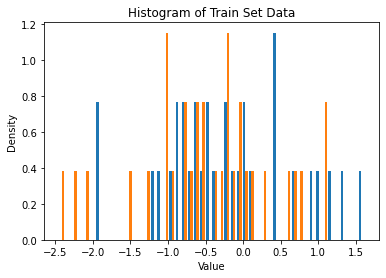

Epoch: 180 Loss D.: 0.695133626461029
Epoch: 180 Loss G.: 0.7234910130500793
Epoch: 190 Loss D.: 0.696366548538208
Epoch: 190 Loss G.: 0.7145790457725525


In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)

        numpy_array = generated_samples.detach().numpy()     
        if(epoch % 30 == 0 and n == 1):
          data = numpy_array
          plt.hist(data, bins=50, density=True)
          plt.title("Histogram of Train Set Data")
          plt.xlabel("Value")
          plt.ylabel("Density")
          plt.show()

        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Drugi przykład:

In [ ]:
import torch

train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = torch.linspace(-3.14, 3.14, train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

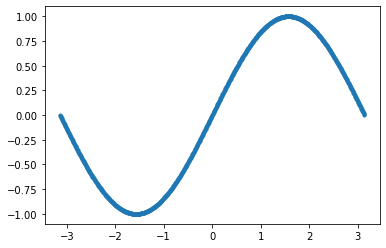

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)
discriminator = Discriminator()
generator = Generator()

lr = 0.001
num_epochs = 200
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

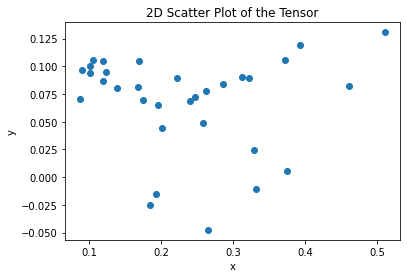

Epoch: 0 Loss D.: 0.3180030286312103
Epoch: 0 Loss G.: 1.620151400566101
Epoch: 10 Loss D.: 0.6136066913604736
Epoch: 10 Loss G.: 0.9668309688568115
Epoch: 20 Loss D.: 0.40894365310668945
Epoch: 20 Loss G.: 1.1487655639648438


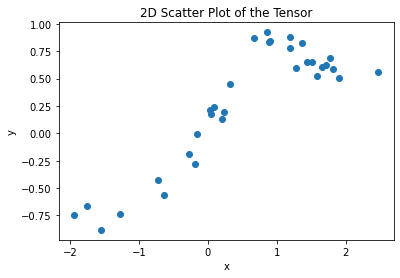

Epoch: 30 Loss D.: 0.6446483135223389
Epoch: 30 Loss G.: 0.9686822891235352
Epoch: 40 Loss D.: 0.5333185195922852
Epoch: 40 Loss G.: 1.0430138111114502
Epoch: 50 Loss D.: 0.8065935373306274
Epoch: 50 Loss G.: 0.6790878176689148


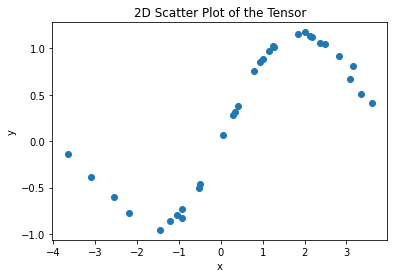

Epoch: 60 Loss D.: 0.6947675943374634
Epoch: 60 Loss G.: 0.8019850254058838
Epoch: 70 Loss D.: 0.6446882486343384
Epoch: 70 Loss G.: 0.7673929333686829
Epoch: 80 Loss D.: 0.7180109024047852
Epoch: 80 Loss G.: 0.6659414172172546


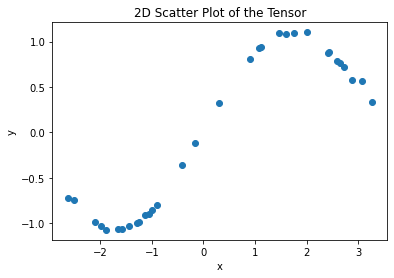

Epoch: 90 Loss D.: 0.6918120384216309
Epoch: 90 Loss G.: 0.6675366759300232
Epoch: 100 Loss D.: 0.6785349249839783
Epoch: 100 Loss G.: 0.7129780650138855
Epoch: 110 Loss D.: 0.6927556991577148
Epoch: 110 Loss G.: 0.6956012845039368


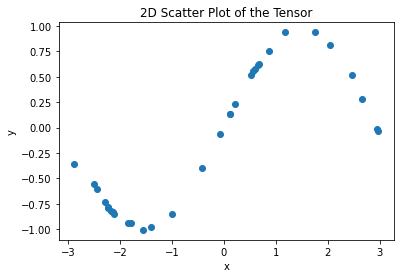

Epoch: 120 Loss D.: 0.7050061821937561
Epoch: 120 Loss G.: 0.6943968534469604
Epoch: 130 Loss D.: 0.6965872049331665
Epoch: 130 Loss G.: 0.7022278308868408
Epoch: 140 Loss D.: 0.6854588389396667
Epoch: 140 Loss G.: 0.6809310913085938


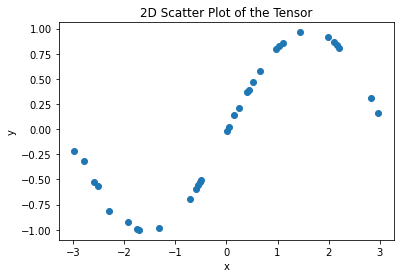

Epoch: 150 Loss D.: 0.6885589957237244
Epoch: 150 Loss G.: 0.7046995759010315
Epoch: 160 Loss D.: 0.6964237093925476
Epoch: 160 Loss G.: 0.6966915130615234
Epoch: 170 Loss D.: 0.6996423006057739
Epoch: 170 Loss G.: 0.6982582807540894


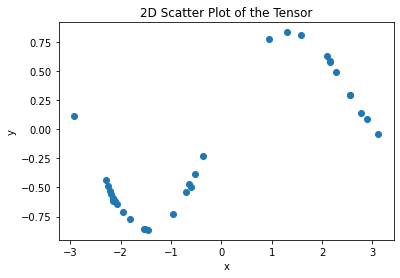

Epoch: 180 Loss D.: 0.6791801452636719
Epoch: 180 Loss G.: 0.8681537508964539
Epoch: 190 Loss D.: 0.7120468616485596
Epoch: 190 Loss G.: 0.6555536985397339


In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)

        numpy_array = generated_samples.detach().numpy()     
        if(epoch % 30 == 0 and n == 1):
          x = [vector[0] for vector in numpy_array]
          y = [vector[1] for vector in numpy_array]
          plt.scatter(x, y)
          plt.xlabel("x")
          plt.ylabel("y")
          plt.title("2D Scatter Plot of the Tensor")
          plt.show()

        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

3)Proszę wytrenować sieć CNN do dobrego rozpoznawania przedstawicieli klas z danych. Następnie
proszę poeksperymentować z losowym zaburzeniem obrazu z danej klasy tak, aby skutecznie zmylić
klasyfikator CNN (przykłady adversialne).

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

def load_and_preprocess_data():
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    train_data = torch.utils.data.DataLoader(trainset, batch_size=100,
                                             shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    test_data = torch.utils.data.DataLoader(testset, batch_size=100,
                                            shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return train_data, test_data, classes

In [ ]:
from torch import optim
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Load and preprocess the data
train_data, test_data, classes = load_and_preprocess_data()

# Define the CNN model
model = CNNModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
for epoch in range(50):
    running_loss = 0.0
    print(epoch)
    for i, data in enumerate(train_data, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on the validation set
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_data:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test set: %d %%' % (
    100 * correct / total))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished Training
Accuracy of the network on the test set: 64 %


In [ ]:
for data in test_data:
        inputs, labels = data
        inputs = inputs.clone().detach().requires_grad_(True)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        eps = 0.01
        
        
        inputs = inputs + eps * inputs.grad.sign()
        
        
        outputs = model(inputs)
        _, predicted_adv = torch.max(outputs.data, 1)
        if classes[predicted[0]] != classes[predicted_adv[0]]:
          print('Original prediction:', classes[predicted[0]])
          print('Adversarial prediction:', classes[predicted_adv[0]])

Original prediction: deer
Adversarial prediction: dog
Original prediction: horse
Adversarial prediction: plane
Original prediction: deer
Adversarial prediction: cat
Original prediction: dog
Adversarial prediction: cat
Original prediction: deer
Adversarial prediction: bird
Original prediction: ship
Adversarial prediction: truck
Original prediction: plane
Adversarial prediction: bird
Original prediction: deer
Adversarial prediction: frog
Original prediction: truck
Adversarial prediction: car
Original prediction: dog
Adversarial prediction: horse
Original prediction: car
Adversarial prediction: truck
Original prediction: cat
Adversarial prediction: bird
Original prediction: truck
Adversarial prediction: horse
Original prediction: cat
Adversarial prediction: frog
Original prediction: frog
Adversarial prediction: car
Original prediction: frog
Adversarial prediction: deer
Original prediction: cat
Adversarial prediction: horse
Original prediction: deer
Adversarial prediction: horse
Original p

4. Wzorując się na dostępnych przykładach zbudować koder i dekoder (autoencoder) własnych przykładów. Celem treningu takiego układu jest dobra kompresja modelu, która daje wgląd w tzw. przestrzeń ukrytą cech (latent space). Zwizualizować grupy punktów należące do różnych klas w przestrzeni ukrytej.

10/10 [==============================] - 0s 1ms/step


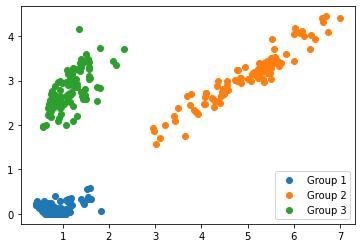

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Dane testowe - trzy grupy punktów w 2D
points1 = np.random.normal(loc=[-2, 2], scale=0.5, size=(100, 2))
points2 = np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2))
points3 = np.random.normal(loc=[0, -2], scale=0.5, size=(100, 2))
points = np.concatenate([points1, points2, points3], axis=0)

# Definicja kodera i dekodera
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu')
])
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation=None)
])

# Definicja całego modelu - autoenkoder
autoencoder = tf.keras.models.Sequential([
    encoder,
    decoder
])

# Kompilacja modelu
autoencoder.compile(optimizer='adam', loss='mse')

# Trenowanie modelu
autoencoder.fit(points, points, epochs=50, batch_size=32, verbose=0)

# Prognozowanie w przestrzeni ukrytej
latent_space = encoder.predict(points)

# Wykres grup punktów w przestrzeni ukrytej
plt.scatter(latent_space[:100, 0], latent_space[:100, 1], label='Group 1')
plt.scatter(latent_space[100:200, 0], latent_space[100:200, 1], label='Group 2')
plt.scatter(latent_space[200:, 0], latent_space[200:, 1], label='Group 3')
plt.legend()
plt.show()

5. Zbudować Autoencoder obrazów składający się z kodera (N x (Conv2D+MaxPool)) i dekodera (N x Conv2DTranspose), gdzie w każdej z tych części dokonuje się stopniowa kompresja/dekompresja obrazu. W obu częściach sieci zbadać przydatność różnych funkcji aktywacji (ostatnią fukcją aktywacji w dekoderze powinien być zasadniczo "sigmoid"). Warstwa Conv2Dtranspose działa jak odwrotna konwolucja (nie w sensie matematycznym, tylko funkcjonalnym, tj. z "filtru" robi "obraz"). Dobroć zmiennych warstwy ukrytej przetestować na zbiorze walidacyjnym.

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
469/469 [==============================] - 157s 331ms/step - loss: 0.1153 - val_loss: 0.1140
Epoch 2/10
469/469 [==============================] - 146s 312ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/10
469/469 [==============================] - 145s 309ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
469/469 [==============================] - 145s 308ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/10
469/469 [==============================] - 146s 311ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/10
469/469 [==============================] - 145s 308ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
469/469 [==============================] - 146s 310ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/10
469/469 [==============================] - 154s 329ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/10
469/469 [==============================] - 142s 303ms/step - loss: 0.1120 - val_loss: 0.1140

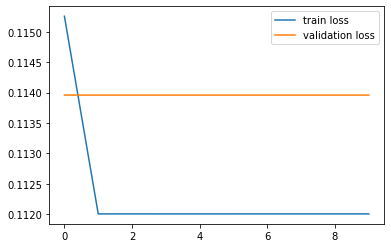

Dobroć modelu na zbiorze walidacyjnym: 0.1140


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Zdefiniuj model autoenkodera
def build_autoencoder(input_shape, activation='relu'):
    # Kodowanie
    input_layer = layers.Input(shape=input_shape, name='input_layer')
    x = layers.Conv2D(32, (3,3), activation=activation, padding='same')(input_layer)
    x = layers.MaxPooling2D((2,2), padding='same')(x)
    x = layers.Conv2D(16, (3,3), activation=activation, padding='same')(x)
    encoded = layers.MaxPooling2D((2,2), padding='same')(x)

    # Dekodowanie
    x = layers.Conv2D(16, (3,3), activation=activation, padding='same')(encoded)
    x = layers.UpSampling2D((2,2))(x)
    x = layers.Conv2D(32, (3,3), activation=activation, padding='same')(x)
    x = layers.UpSampling2D((2,2))(x)
    decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_layer, decoded, name='autoencoder')
    return autoencoder

# Załaduj dane
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

# Zdefiniuj funkcję straty i optymalizator
mse_loss = tf.keras.losses.MeanSquaredError()
adam_optimizer = tf.keras.optimizers.Adam()

# Skompiluj model
autoencoder = build_autoencoder(x_train.shape[1:], activation='relu')
autoencoder.compile(optimizer=adam_optimizer, loss=mse_loss)

# Wytrenuj model
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))


# Wyświetl wyniki uczenia
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Oblicz Dobroć modelu na zbiorze walidacyjnym
val_loss = autoencoder.evaluate(x_test, x_test, verbose=0)

# Wyświetl Dobroć modelu na zbiorze walidacyjnym
print("Dobroć modelu na zbiorze walidacyjnym: {:.4f}".format(val_loss))

6.Generować obiekty za pomocą VAE (Variational Autoencoder).

In [ ]:
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Pobranie danych uczących MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

# Konwersja danych do tablicy numpy
train_data = np.zeros((len(train_dataset), 28*28))
for i in range(len(train_dataset)):
    img, label = train_dataset[i]
    img = img.numpy().flatten()
    train_data[i,:] = img

# Zapisanie danych do pliku
np.save('train_data.npy', train_data)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Ustawienie parametrów sieci VAE
input_size = 784
hidden_size = 400
latent_size = 20

# Definicja modelu VAE
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc21 = nn.Linear(hidden_size, latent_size)
        self.fc22 = nn.Linear(hidden_size, latent_size)
        self.fc3 = nn.Linear(latent_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, input_size)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, input_size))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Ustawienie hiperparametrów
learning_rate = 1e-3
num_epochs = 10
batch_size = 128

# Wczytanie danych uczących
train_data = np.load('train_data.npy')

# Inicjalizacja modelu i optymalizatora
model = VAE()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Uczenie modelu
for epoch in range(num_epochs):
    total_loss = 0
    for i in range(0, len(train_data), batch_size):
        batch = train_data[i:i+batch_size]
        batch = torch.tensor(batch, dtype=torch.float32)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(batch)
        recon_loss = nn.functional.binary_cross_entropy(recon_batch, batch, reduction='sum')
        kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        loss = recon_loss + kl_loss
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
    print("Epoch %d, loss: %.4f" % (epoch+1, total_loss / len(train_data)))

# Generowanie próbek z modelu
num_samples = 10
z = torch.randn(num_samples, latent_size)
generated_data = model.decode(z).detach().numpy()

# Zapisanie wyników do pliku
np.save('generated_data.npy', generated_data)

Epoch 1, loss: 168.8377
Epoch 2, loss: 125.1444
Epoch 3, loss: 116.1061
Epoch 4, loss: 112.5481
Epoch 5, loss: 110.5174
Epoch 6, loss: 109.2050
Epoch 7, loss: 108.2930
Epoch 8, loss: 107.5948
Epoch 9, loss: 107.0709
Epoch 10, loss: 106.5652


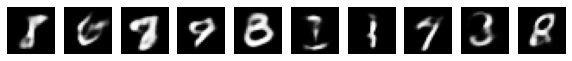

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Odczytanie danych z pliku
generated_data = np.load('generated_data.npy')

# Wyświetlenie wygenerowanych obrazów
num_samples = generated_data.shape[0]
fig, axes = plt.subplots(nrows=1, ncols=num_samples, figsize=(num_samples, 1))
for i in range(num_samples):
    img = generated_data[i,:].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
plt.show()

7.Proszę przenieść na dowolny obraz styl innego zbioru obrazów (CNN).

In [ ]:
import tensorflow as tf

content_path = tf.keras.utils.get_file('test1.png', 
                                       origin='https://github.com/Jakub-Syrek/ML/blob/main/test1.png?raw=true', cache_dir='.')

style_path = tf.keras.utils.get_file('Andy-Warhol--Marilyn-Monroe-Hot-Pink-1967-Andy-Warhol-Poster.jpg',
                                     'https://product-image.juniqe-production.juniqe.com/media/catalog/product/seo-cache/x800/7/7/776-8-101P-13x18-1/Andy-Warhol--Marilyn-Monroe-Hot-Pink-1967-Andy-Warhol-Poster.jpg', cache_dir='.')


70264/70264 [==============================] - 0s 1us/step


In [ ]:
def img_scaler(image, max_dim = 256):
  # Casts a tensor to a new type.
  original_shape = tf.cast(tf.shape(image)[:-1], tf.float32)
  # Creates a scale constant for the image
  scale_ratio = 4 * max_dim / max(original_shape)
  # Casts a tensor to a new type.
  new_shape = tf.cast(original_shape * scale_ratio, tf.int32)
  # Resizes the image based on the scaling constant generated above
  return tf.image.resize(image, new_shape)

def load_img(path_to_img):
  # Reads and outputs the entire contents of the input filename.
  img = tf.io.read_file(path_to_img)
  # Detect whether an image is a BMP, GIF, JPEG, or PNG, and 
  # performs the appropriate operation to convert the input 
  # bytes string into a Tensor of type dtype
  #img = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
  
  img = tf.image.decode_image(img, channels=3)
  # Convert image to dtype, scaling (MinMax Normalization) its values if needed.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Scale the image using the custom function we created
  img = img_scaler(img)
  # Adds a fourth dimension to the Tensor because
  # the model requires a 4-dimensional Tensor
  return img[tf.newaxis, :]



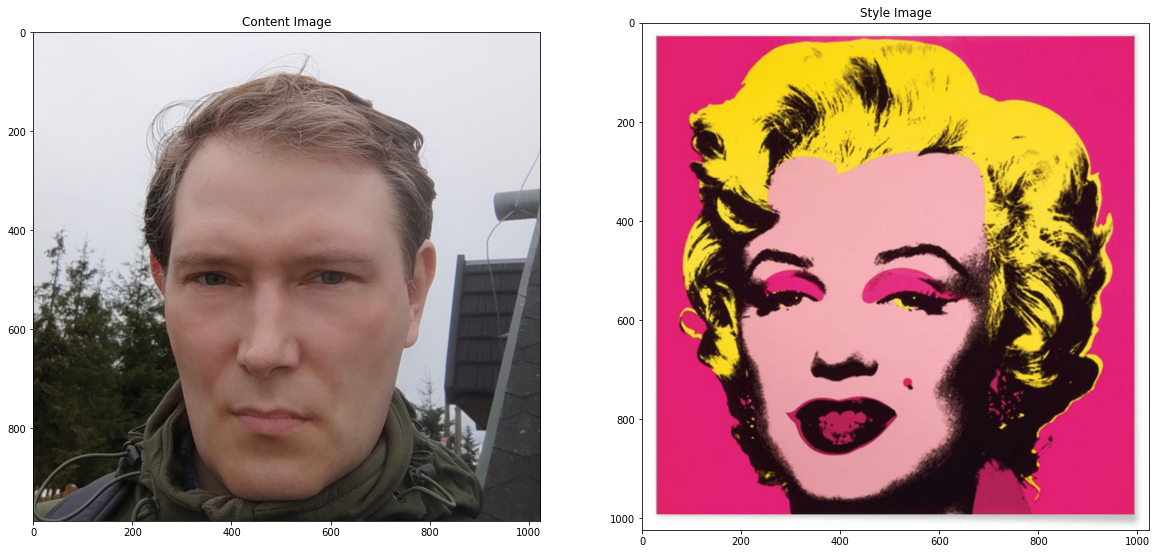

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)
 
import matplotlib.pyplot as plt 
plt.figure(figsize=(20, 20)) 
plt.subplot(1, 2, 1) 
plt.imshow(content_image[0]) 
plt.title('Content Image') 
plt.subplot(1, 2, 2) 
plt.imshow(style_image[0]) 
plt.title('Style Image')

plt.show()

In [ ]:
# Creates a pre-trained VGG model which takes an input and returns a list of intermediate output values 
def vgg_layers(layer_names):
  """ Creates a vgg model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  outputs = [vgg.get_layer(name).output for name in layer_names]
  model = tf.keras.Model([vgg.input], outputs)
  return model

def gram_matrix(input_tensor):
  # Tensor contraction over specified indices and outer product.
  # Matrix multiplication
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  # Save the shape of the input tensor
  input_shape = tf.shape(input_tensor)
  # Casts a tensor to a new type.
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  # Divide matrix multiplication output to num_locations
  return result/(num_locations)

# We will use block5 conv2 layer for content 
content_layers = ['block5_conv2'] 
# We will use conv1 layers from every block for style 
style_layers = ['block1_conv1','block2_conv1','block3_conv1', 'block4_conv1','block5_conv1']

class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()

    # The main 
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.vgg.trainable = False

    # Used as keys in dict creation
    self.style_layers = style_layers
    self.content_layers = content_layers
    # self.num_style_layers = len(style_layers)
    

  def call(self, inputs):
    # Process the image input
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)

    # Feed the preprocessed image to the VGG19 model
    outputs = self.vgg(preprocessed_input)
    # Separate style and content outputs
    style_outputs, content_outputs = (outputs[:len(self.style_layers)], 
                                      outputs[len(self.style_layers):])
    # Process style output before dict creation
    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]


    # Create two dicts for content and style outputs
    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}
    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}
  
extractor = StyleContentModel(style_layers, content_layers)
# Set your style and content target values:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Create an optimizer. The paper recommends LBFGS, but Adam works okay, too:
opt = tf.optimizers.Adam(learning_rate=0.005, beta_1=0.99, epsilon=1e-1)

# To optimize this, use a weighted combination of the two losses to get the total loss:
style_weight=1e-2
content_weight=1e4

def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / len(style_layers)

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / len(content_layers)
    loss = style_loss + content_loss
    return loss

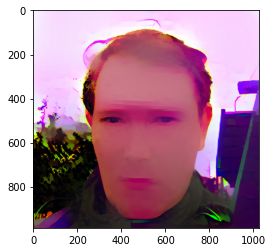

Train step: 2000


In [ ]:
total_variation_weight=500

@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(tf.clip_by_value(image, 
                                clip_value_min=0.0, 
                                clip_value_max=1.0))
  
import IPython.display as display

image = tf.Variable(content_image)
epochs = 20
steps_per_epoch = 100
step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  plt.imshow(image[0])
  plt.show()
  print("Train step: {}".format(step))